# **# RFM Analizi İle Müşteri Segmentasyonu**

Online ayakkabı mağazası olan FLO müşterilerini
segmentlere ayırıp bu segmentlere göre pazarlama
stratejileri belirlemek istiyor. Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.



---


Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

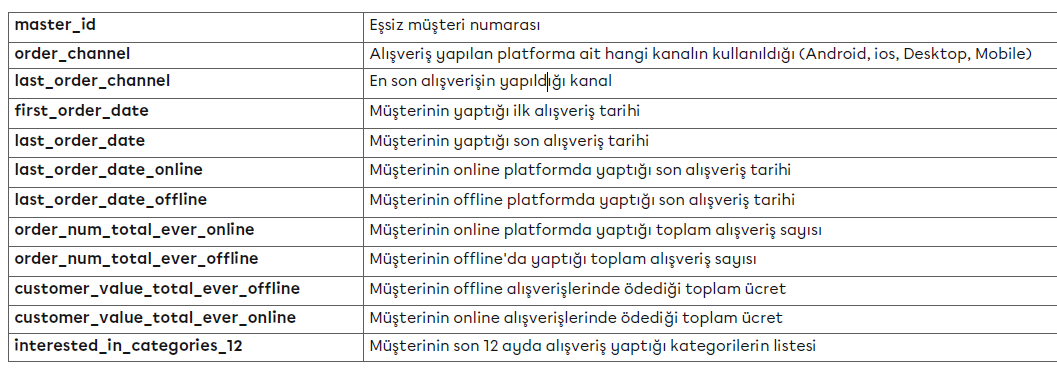

# **Proje Adımları**
**Adım 1:**
flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.

**Adım 2:**
Veri setinde

1. İlk 10 gözlem,
2. Değişken isimleri,
3. Betimsel istatistik,
4. Boş değer,
5. Değişken tipleri, incelemesi

**Adım 3:** Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.


**Adım 4:** Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.


**Adım 5:** Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.


**Adım 6:** En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.


**Adım 7:** En fazla siparişi veren ilk 10 müşteriyi sıralayınız.


**Adım 8:** Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [1]:
import pandas as pd
import os

In [8]:
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Adım 1: flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.

In [3]:
df_ = pd.read_csv('/content/flo_data_20k.csv')

In [4]:
df = df_.copy()

**Adım 2:** Veri setinde

İlk 10 gözlem,

Değişken isimleri,

Betimsel istatistik,

Boş değer,

Değişken tipleri, **incelemesi**

In [5]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [36]:
df.columns #sütun isimleri

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'total_sale', 'total_value'],
      dtype='object')

In [40]:
df.shape #veri adedi

(19945, 14)

In [43]:
df.isnull().sum() #boş veriler

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [49]:
df.describe().T #betimsel istatistik

,count,mean,min,25%,50%,75%,max,std
first_order_date,19945,2019-03-22 16:43:55.246929152,2013-01-14 00:00:00,2019-02-16 00:00:00,2019-08-20 00:00:00,2020-01-01 00:00:00,2021-05-27 00:00:00,NaN
last_order_date,19945,2021-01-17 12:59:57.653547264,2020-05-30 00:00:00,2020-11-11 00:00:00,2021-02-10 00:00:00,2021-04-19 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_online,19945,2020-08-10 01:08:52.644773376,2014-02-24 00:00:00,2020-06-18 00:00:00,2020-12-14 00:00:00,2021-04-05 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_offline,19945,2020-05-17 12:07:24.021058048,2019-01-22 00:00:00,2019-11-04 00:00:00,2020-06-22 00:00:00,2020-12-25 00:00:00,2021-05-28 00:00:00,NaN
order_num_total_ever_online,19945.000,3.111,1.000,1.000,2.000,4.000,200.000,4.226
order_num_total_ever_offline,19945.000,1.914,1.000,1.000,1.000,2.000,109.000,2.063
customer_value_total_ever_offline,19945.000,253.923,10.000,99.990,179.980,319.970,18119.140,301.533
customer_value_total_ever_online,19945.000,497.322,12.990,149.980,286.460,578.440,45220.130,832.602
total_sale,19945.000,5.025,2.000,3.000,4.000,6.000,202.000,4.743
total_value,19945.000,751.244,44.980,339.980,545.270,897.780,45905.100,895.402


In [11]:
df.info() #veri tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [46]:
df['order_channel'].value_counts() #order channel dağılımı

,count
order_channel,
Android App,9495
Mobile,4882
Ios App,2833
Desktop,2735


In [48]:
df['interested_in_categories_12'].value_counts() #kategori dağılım

,count
interested_in_categories_12,
[AKTIFSPOR],3464
[KADIN],2158
[],2135
[ERKEK],1973
"[KADIN, AKTIFSPOR]",1352
"[ERKEK, AKTIFSPOR]",1178
"[ERKEK, KADIN]",848
[COCUK],836
"[ERKEK, KADIN, AKTIFSPOR]",775


**Adım 3:** Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [12]:
df.sort_values(by='last_order_date', ascending=False).head() #Recency hesaplamak için analiz tarihimizi değiştiriyoruz.

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,Android App,Android App,2019-12-27,2021-05-30,2021-05-30,2019-12-27,15.000,1.000,229.980,9723.330,"[AKTIFCOCUK, KADIN, AKTIFSPOR]"
19111,3991df04-d707-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-12,2021-05-30,2021-05-30,2021-04-26,1.000,2.000,319.970,319.990,[AKTIFSPOR]
18383,a0288834-5bf1-11ea-9714-000d3a38a36f,Mobile,Mobile,2019-12-27,2021-05-30,2021-05-30,2019-12-27,3.000,1.000,112.990,620.970,[]
15885,73dbc3ba-1f72-11ea-87bf-000d3a38a36f,Android App,Android App,2019-09-29,2021-05-30,2021-05-30,2019-09-29,1.000,1.000,79.990,215.920,[]
3333,4ca1591c-a6b5-11e9-a2fc-000d3a38a36f,Desktop,Desktop,2014-11-14,2021-05-30,2021-05-30,2019-03-14,13.000,1.000,89.990,1668.720,"[COCUK, AKTIFSPOR]"


In [13]:
df['last_order_date'].max() #max tarihi öğrenmek için diğer bir yöntem

'2021-05-30'

In [14]:
today_date = dt.datetime(2021, 6, 2) #tarihimizi max date'den 2 gün sonrasına attık

In [15]:
#şimdi her bir müşterinin toplam alışveriş sayısı ve harcamasını bulalım
# Satış miktarı için: (order_num_total_ever_online)	+ (order_num_total_ever_offline)
# Satış değeri için: (customer_value_total_ever_offline) + (customer_value_total_ever_online)
df['total_sale'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['total_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [59]:
df.head(3)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_sale,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320




---


Adım 4: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.


---



In [16]:
#for döngüsüyle date'e çevirelim
for i in ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']:
  df[i] = pd.to_datetime(df[i])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  



---

Adım 5: **Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların** dağılımına bakınız.

---



In [62]:
df.groupby('order_channel').agg({
    'master_id':'count',
    'total_sale':'sum',
    'total_value':'sum'
})

,master_id,total_sale,total_value
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


In [18]:
df['total_sale'].sum() #toplam satışlar

100219.0

In [19]:
df['total_value'].sum() #toplam satışların değeri

14983567.309999999



---


Adım 6: En fazla satın alım yapan ilk 10 müşteriyi sıralayınız.


---

In [63]:
df.sort_values(by='total_sale',ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_sale,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],88.000,8572.230
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],83.000,4240.360
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",77.000,5184.050
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.000,5297.880
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570




---


Adım 6: En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.


---

In [64]:
df.sort_values(by='total_value',ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_sale,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.000,36818.290
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",11.000,31227.410
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],4.000,20706.340
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",37.000,12726.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",20.000,12103.150




---



---


## **Görev 2: RFM Metriklerinin Hesaplanması**


---



---



**Recency**: Müşterinin sıcaklığını belirler. Analiz tarihinden her bir müşterinin son satın alma tarihi çıkarılır. Ters orantılı olarak puanlanır.

**Frequency**: Müşterinin satın alma sıklığını temsil eder. İlk alımıyla son alımı arasında kaç kere satın alındığının analizidir. Doğru orantılı puanlanır.

**Monetary**: Her bir müşterinin toplam bıraktığı parasal değerin gücünü temsil eder. Doğru orantılı puanlanır.



---


Recency Sütunu:

In [22]:
rfm = df.groupby('master_id').agg({
    'last_order_date':lambda last_order_date:(today_date-last_order_date.max()).days,
})

In [23]:
rfm.head()

,last_order_date
master_id,
00016786-2f5a-11ea-bb80-000d3a38a36f,11
00034aaa-a838-11e9-a2fc-000d3a38a36f,299
000be838-85df-11ea-a90b-000d3a38a36f,214
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21




---


Frequency Sütunu: (zaten önceden hesaplamıştık df'den merge ediyoruz)

In [24]:
rfm = rfm.merge(df[['master_id','total_sale']], on='master_id', how='left')



---


Monetary Sütunu: (zaten önceden hesaplamıştık df'den merge ediyoruz)

In [25]:
rfm= rfm.merge(df[['master_id','total_value']], on='master_id',how='left')

In [26]:
rfm.columns=['master_id','recency','frequency','monetary']

In [27]:
rfm.head(10)

,master_id,recency,frequency,monetary
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330
5,00136ce2-a562-11e9-a2fc-000d3a38a36f,204,2.000,359.450
6,00142f9a-7af6-11eb-8460-000d3a38a36f,26,3.000,404.940
7,0014778a-5b11-11ea-9a2c-000d3a38a36f,27,3.000,727.430
8,0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,127,2.000,317.910
9,0022f41e-5597-11eb-9e65-000d3a38a36f,13,2.000,154.980


In [28]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.000,135.458,103.281,3.000,44.000,112.000,203.000,368.000
frequency,19945.000,5.025,4.743,2.000,3.000,4.000,6.000,202.000
monetary,19945.000,751.244,895.402,44.980,339.980,545.270,897.780,45905.100


Adım 1: Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

In [29]:
rfm['R_score'] = pd.qcut(rfm['recency'], 5 ,labels = [5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels =[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['monetary'], 5 ,labels =[1,2,3,4,5])

In [30]:
rfm.head()

,master_id,recency,frequency,monetary,R_score,F_score,M_score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,5,4,4
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,1,2,1
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,2,3,4
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,5,4,4
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,5,4,5


In [31]:
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str)+
    rfm['F_score'].astype(str)+
    rfm['M_score'].astype(str)
)

In [32]:
rfm.head()

,master_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,5,4,4,544
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,1,2,1,121
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,2,3,4,234
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,5,4,4,544
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,5,4,5,545


In [33]:
seg_map = {
    r'[1-2][1-2][1-5]': 'uykuda',
    r'[1-2][3-4][1-5]': 'riskli',
    r'[1-2]5[1-5]': 'kaybedilmemeli',
    r'3[1-2][1-5]': 'uyumak_uzere',
    r'33[1-5]': 'dikkat',
    r'[3-4][4-5][1-5]': 'sadik',
    r'41[1-5]': 'umit_verici',
    r'51[1-5]': 'yeni',
    r'[4-5][2-3][1-5]': 'potansiyel_sadik',
    r'5[4-5][1-5]': 'sampiyon'
}

In [34]:
rfm['segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)
rfm.head()

,master_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,5,4,4,544,sampiyon
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,1,2,1,121,uykuda
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,2,3,4,234,riskli
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,5,4,4,544,sampiyon
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,5,4,5,545,sampiyon


In [35]:
rfm[['segment','recency','frequency','monetary']].groupby('segment').agg(['mean','count'])

recency       frequency       monetary      
                    mean count      mean count     mean count
segment                                                      
dikkat           114.037   806     3.739   806  553.437   806
kaybedilmemeli   236.159  1194    10.717  1194 1481.652  1194
potansiyel_sadik  37.870  2925     3.311  2925  533.741  2925
riskli           243.329  3152     4.470  3152  648.325  3152
sadik             83.558  3375     8.356  3375 1216.257  3375
sampiyon          18.142  1920     8.965  1920 1410.709  1920
umit_verici       59.695   668     2.000   668  334.153   668
uykuda           248.426  3589     2.391  3589  362.583  3589
uyumak_uzere     115.032  1643     2.407  1643  361.649  1643
yeni              18.976   673     2.000   673  344.049   673